<br><br>
#HW#2
###숙제 번호: HW#2 <br>
###과목명: 인공지능 <br>
###이름: 정준영 <br>
###전공: 컴퓨터과학 <br>
###학번: 202011024 <br><br>



In [ ]:
%cd /content/drive/MyDrive/AI Lab/cifar-10-batches-py
!pwd

/content/drive/MyDrive/AI Lab/cifar-10-batches-py
/content/drive/MyDrive/AI Lab/cifar-10-batches-py


In [ ]:
import numpy as np

In [ ]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
      dict = pickle.load(fo, encoding='bytes')
    return dict


In [ ]:
bat1 = unpickle('data_batch_1')
bat2 = unpickle('data_batch_2')
bat3 = unpickle('data_batch_3')
bat4 = unpickle('data_batch_4')
bat5 = unpickle('data_batch_5')
bat_test = unpickle('test_batch')

In [ ]:
data = np.concatenate([bat1[b'data'], bat2[b'data'], bat3[b'data'],bat4[b'data'],
bat5[b'data']])
labels = np.concatenate([bat1[b'labels'], bat2[b'labels'], bat3[b'labels'],bat4[b'labels'],
bat5[b'labels']])

In [ ]:
train_data = data
train_label = labels
test_data = bat_test[b'data']
test_label = bat_test[b'labels']
test_size = 10

In [ ]:
%cd /content/drive/MyDrive/AI Lab/
!pwd

/content/drive/MyDrive/AI Lab
/content/drive/MyDrive/AI Lab


In [ ]:

# from knn import NearestNeighbor

NN_classifier = NearestNeighbor()
NN_classifier.train(train_data,train_label)
test_in = test_data[0:test_size]
pred = NN_classifier.predict(test_in, 1, 'L1')

<br><br>
# Assignment conditions
KNN의 K는 1, 3, 5, 7, 9 등의 숫자를 의미한다. Lab3에서 구현된 NearestNeighbor Class는 K=1일 경우에 해당하는 코드이다.

1. knn.py를 수정하여 K 값으로 임의의 홀수를 입력할 수 있도록 하세요.

2. K가 15까지 증가하면서 accuracy가 어떻게 변화하는 지 그래프로 나타내세요.

3. L2를 사용하여 구현하고 2번을 반복하세요.

4. 2의 결과와 3의 결과를 비교할 수 있도록 그래프로 나타내세요.

# 소스코드 및 설명 & 실행결과
<br><br><br><br>

In [ ]:
import numpy as np

class NearestNeighbor:
    def __init__(self):
        pass

    def train(self, X, y):
        self.Xtr = X
        self.ytr = y

    def predict(self, X, k, L): # condition 만족을 위해 매개변수 k, L 추가

      # condition No.1 K(임의의 홀수) 받을 수 있도록
        if k <= 0 or k % 2 == 0:
            raise ValueError("K는 1, 3, 5, 7, 9 ... 와 같은 임의의 홀수")


        num_test = X.shape[0]
        Ypred = np.zeros(num_test, dtype=self.ytr.dtype)

       # condition No.2 L1을 이용
        if ( L == 'L1'):
            for i in range(num_test):
              distances = np.sum(np.abs(self.Xtr - X[i,:]), axis = 1)
              closest_y = self.ytr[np.argsort(distances)[:k]]
              Ypred[i] = np.argmax(np.bincount(closest_y))

        else:
           # condition No.3 L2를 사용하여 No.2 반복

           for i in range(num_test):
            # 정확도 올리기 두 점 사이의 차를 제곱, 제곱된 차이의 각 차원을 합산, 제곱근을 통해 distance 계산
             distances = np.sqrt(np.sum(np.square(self.Xtr - X[i, :]), axis=1))

            # closest_y 배열에는 각 테스트 데이터 포인트에 대한 가장 가까운 이웃의 label을 포함
             closest_y = self.ytr[np.argsort(distances)[:k]]

            # closest_y 배열에 있는 각 label의 등장 횟수를 계산, 가장 많이 나온 label의 index를 해당 index 값 할당
             Ypred[i] = np.argmax(np.bincount(closest_y))
        return Ypred

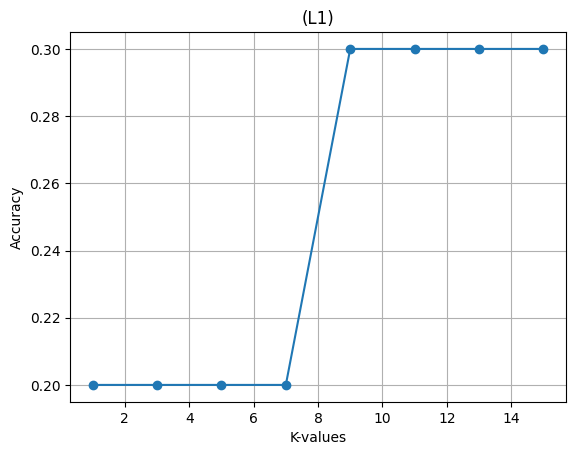

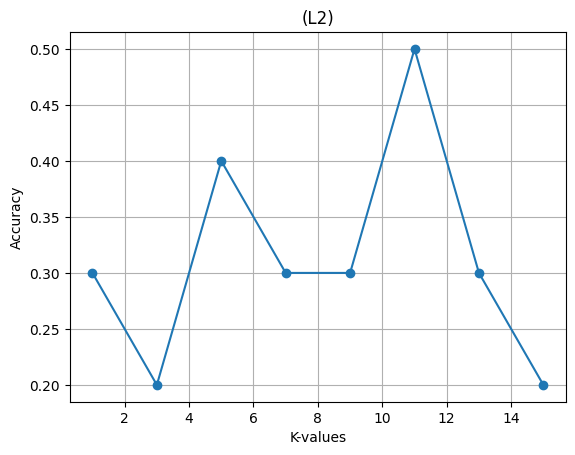

In [32]:
import matplotlib.pyplot as plt

# 정확도를 판단하는 함수 정의
def evaluate_accuracy(y_true, y_pred):
    return np.mean(y_true == y_pred)

## condition No.4 두 그래프 비교를 위한 함수
def plot_accuracy(k_values, accuracies, title):
    plt.plot(k_values, accuracies, marker='o')
    plt.title(title)
    plt.xlabel('K-values')
    plt.ylabel('Accuracy')
    plt.grid(True)
    plt.show()

# condition No.2, No.3을 충족하기 위해 k = 15
k_values = list(range(1, 16, 2))
accuracies_l1 = []
accuracies_l2 = []

# L1 거리를 사용한 정확도 평가
for k in k_values:
    nn_classifier_l1 = NearestNeighbor()
    nn_classifier_l1.train(train_data, train_label)
    y_pred_l1 = nn_classifier_l1.predict(test_in, k, 'L1')
    accuracy_l1 = evaluate_accuracy(test_label[:test_size], y_pred_l1)
    accuracies_l1.append(accuracy_l1)

# L2 거리를 사용한 정확도 평가
for k in k_values:
    nn_classifier_l2 = NearestNeighbor()
    nn_classifier_l2.train(train_data, train_label)
    y_pred_l2 = nn_classifier_l2.predict(test_in, k, 'L2')
    accuracy_l2 = evaluate_accuracy(test_label[:test_size], y_pred_l2)
    accuracies_l2.append(accuracy_l2)

# 두 그래프 플로팅
plot_accuracy(k_values, accuracies_l1, "(L1)")
plot_accuracy(k_values, accuracies_l2, "(L2)")

<br><br><br><br>
#Conclusion
L1과 L2, 두 그래프를 확인한 결과 <br>
L2가 L1보다는 K 값이 증가할수록 정확도가 <br>
높아진다는 결론을 얻을 수 있었다.